<a href="https://colab.research.google.com/github/MiladQolami/Mathematical-tools-for-neuroscience/blob/main/Machine_Learning/IntroToLibraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# **Pandas**

## Introduction

Pandas is a popular open-source library in Python for data manipulation and analysis. It provides powerful data structures and data analysis tools that make working with structured data more efficient and intuitive.

## Pandas Data Structures

Most important data structures in Pandas are Series and DataFrames.

### Series


In [34]:
series1 = pd.Series([1, 3, 4, 2, 6, 4, 4])
series1


0    1
1    3
2    4
3    2
4    6
5    4
6    4
dtype: int64

### DataFrames


In [35]:
observation = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [80, 90, 75],
    'Science': [85, 92, 88],
    'English': [70, 80, 78]
}
dataframe1 = pd.DataFrame(data=observation)
dataframe1

,Name,Math,Science,English
0,Alice,80,85,70
1,Bob,90,92,80
2,Charlie,75,88,78


## Reshaping DataFrames


### Melting a DataFrame


In [36]:

melted_df = pd.melt(dataframe1, id_vars='Name', value_vars=['Math', 'Science', 'English'], var_name='Subject', value_name='Score')
melted_df


,Name,Subject,Score
0,Alice,Math,80
1,Bob,Math,90
2,Charlie,Math,75
3,Alice,Science,85
4,Bob,Science,92
5,Charlie,Science,88
6,Alice,English,70
7,Bob,English,80
8,Charlie,English,78


### Pivoting a DataFrame


In [37]:
pd.pivot(melted_df, index='Name', columns='Subject', values='Score')


Subject,English,Math,Science
Name,,,
Alice,70,80,85
Bob,80,90,92
Charlie,78,75,88


## Subsetting DataFrames


### Loading a bigger dataset


In [132]:
data = datasets.fetch_california_housing()  # Load California housing dataset

CalHous = pd.DataFrame(data.data, columns=data.feature_names)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Checking columns of the dataset


In [58]:
CalHous.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

### Viewing first four rows


In [59]:
CalHous

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### Randomly sampling some rows


In [60]:
CalHous.sample(5)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16974,4.9013,45.0,5.635220,0.946541,829.0,2.606918,37.56,-122.31
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
6569,4.5000,46.0,5.594796,0.970260,857.0,3.185874,34.20,-118.15
9331,2.7273,25.0,3.601545,1.049669,5917.0,3.265453,37.97,-122.50
11967,2.0742,31.0,4.212014,1.084806,1013.0,3.579505,34.00,-117.40


### Selecting n rows with largest (or smallest) values


In [62]:
CalHous.nlargest(n=5, columns='HouseAge')


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25


### Logical indexing of rows


In [63]:
CalHous[CalHous['HouseAge'] > 50]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
...,...,...,...,...,...,...,...,...
20142,1.8618,52.0,4.157718,1.073826,934.0,3.134228,34.36,-119.06
20220,4.1250,52.0,5.639798,1.057935,941.0,2.370277,34.28,-119.27
20236,2.3750,52.0,4.289720,1.046729,276.0,2.579439,34.27,-119.27
20237,3.5893,52.0,4.707463,1.023881,836.0,2.495522,34.27,-119.27


### Selecting single or multiple columns


In [69]:
CalHous['HouseAge']   # Selecting a single column
CalHous[['HouseAge', 'AveRooms']]     # Selecting 2 columns
CalHous.filter(regex='^Ave')   # Selecting those columns that start with 'Ave*'

,AveRooms,AveBedrms,AveOccup
0,6.984127,1.023810,2.555556
1,6.238137,0.971880,2.109842
2,8.288136,1.073446,2.802260
3,5.817352,1.073059,2.547945
4,6.281853,1.081081,2.181467
...,...,...,...
20635,5.045455,1.133333,2.560606
20636,6.114035,1.315789,3.122807
20637,5.205543,1.120092,2.325635
20638,5.329513,1.171920,2.123209


### Subsetting rows and columns based on integer location


In [71]:
CalHous.iloc[12:15]   # Selectin rows from 12 to 15
CalHous.iloc[20:30, 3:5] # Selecting rows 20 to 30 and columns 3 to 5


,AveBedrms,Population
20,1.108434,409.0
21,1.002732,929.0
22,1.131799,1015.0
23,1.036923,853.0
24,1.035545,1006.0
25,1.033613,317.0
26,1.020921,607.0
27,1.060453,1102.0
28,1.040169,1131.0
29,1.032258,395.0


### Indexing and selecting data based on labels of rows and columns ( not integer location)


In [73]:
CalHous.loc[0:10, ['AveBedrms', 'Population']]


,AveBedrms,Population
0,1.023810,322.0
1,0.971880,2401.0
2,1.073446,496.0
3,1.073059,558.0
4,1.081081,565.0
5,1.103627,413.0
6,0.951362,1094.0
7,1.061824,1157.0
8,1.117647,1206.0
9,0.990196,1551.0


## Data Summaries


### Summary statistics


In [74]:
CalHous.describe()
CalHous.median()

MedInc           3.534800
HouseAge        29.000000
AveRooms         5.229129
AveBedrms        1.048780
Population    1166.000000
AveOccup         2.818116
Latitude        34.260000
Longitude     -118.490000
dtype: float64

### Shape of the DataFrame


In [75]:
CalHous.shape

(20640, 8)

### Applying a function to the DataFrame


In [76]:
CalHous.apply(np.sqrt)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.885342,6.403124,2.642750,1.011835,17.944358,1.598611,6.154673,NaN
1,2.881215,4.582576,2.497626,0.985840,49.000000,1.452529,6.153048,NaN
2,2.693956,7.211103,2.878912,1.036073,22.271057,1.673995,6.152235,NaN
3,2.375521,7.211103,2.411919,1.035886,23.622024,1.596228,6.152235,NaN
4,1.961173,7.211103,2.506363,1.039750,23.769729,1.476979,6.152235,NaN
...,...,...,...,...,...,...,...,...
20635,1.249120,5.000000,2.246209,1.064581,29.068884,1.600189,6.283311,NaN
20636,1.599000,4.242641,2.472657,1.147079,18.867962,1.767147,6.284107,NaN
20637,1.303840,4.123106,2.281566,1.058344,31.733263,1.525003,6.279331,NaN
20638,1.366455,4.242641,2.308574,1.082552,27.221315,1.457124,6.279331,NaN



## Grouping Data

We can group data using the groupby() function. This function allows us to group rows based on one or more columns, and then perform operations on those groups.

In [78]:
gruoped_CalHous = CalHous.groupby('HouseAge')

###Taking average in each group

In [ ]:
gruoped_CalHous['Population'].mean()   # Average of population in each group

### Size of each group

In [ ]:
gruoped_CalHous.size()

### Aggregating each group

We use groupby().agg() function to perform aggregate operations on grouped data.

In [ ]:
gruoped_CalHous.agg({'HouseAge':'mean','AveBedrms':'sum'})  # Taking average of HouseAge and summing AveBedrms whiting each group

In [98]:
data = {
    'Date': pd.date_range(start='2023-01-01', periods=5),
    'Value': [10, 5, 7, 12, 8]
}
df = pd.DataFrame(data)


,Date,Value
0,2023-01-01,10
1,2023-01-02,5
2,2023-01-03,7
3,2023-01-04,12
4,2023-01-05,8


## Adding a new column

In [118]:
CalHous['NewCol'] = CalHous['AveBedrms']*CalHous['HouseAge']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,NewCol
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,41.976190
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,20.409490
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,55.819209
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,55.799087
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,56.216216
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,28.333333
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,23.684211
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,19.041570
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,21.094556


In [ ]:
CalHous

## Plotting

<Axes: ylabel='Frequency'>

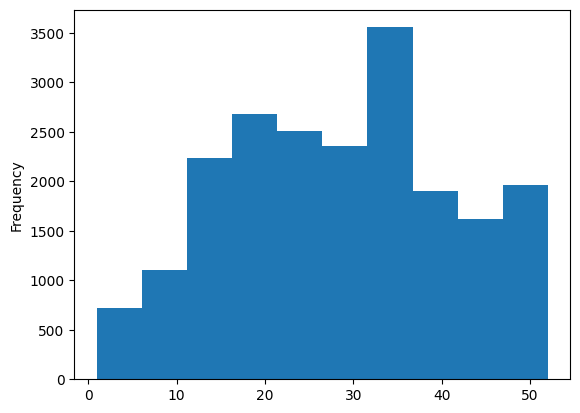

In [117]:
CalHous['HouseAge'].plot.hist()  # Histogram of 'HouseAge'

<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

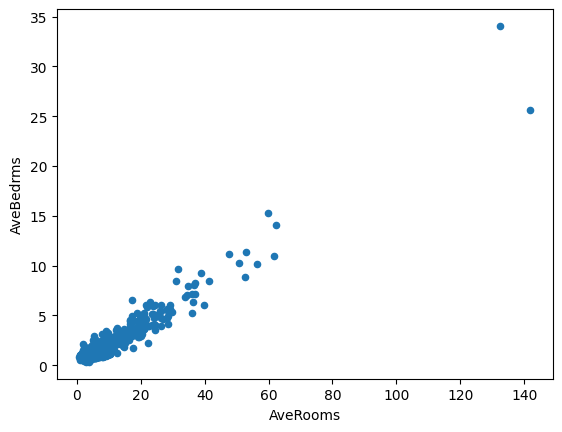

In [120]:
CalHous.plot.scatter(x='AveRooms',y= 'AveBedrms') # Relationsship between 'AveRooms' and 'AveBedrms'

# **Scikit-learn**


Scikit-learn is a popular machine learning library in Python. Scikit-learn provides a wide range of tools for data preprocessing, model training, evaluation, and more. Here we overview some key components and steps involved in using scikit-learn for machine learning tasks.

In [163]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score


## Selecting data

In [169]:
X = CalHous['AveBedrms']
y = CalHous['AveRooms']


## Spliting data into test and train sets

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Choosing a model

In [171]:
reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

ValueError: ignored

LinearRegression expects a 2D array as x inputs number of row represents number of samples and number of columns represents number of features. So we need to reshape it.

In [178]:
X = CalHous['AveBedrms'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = linear_model.LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

###Computing the prediction of the model

In [179]:
y_pred = reg.predict(X_test)


### Computing mean squared error

In [180]:
mean_squared_error(y_test,y_pred)

1.7964766254401687

### Plotting the result

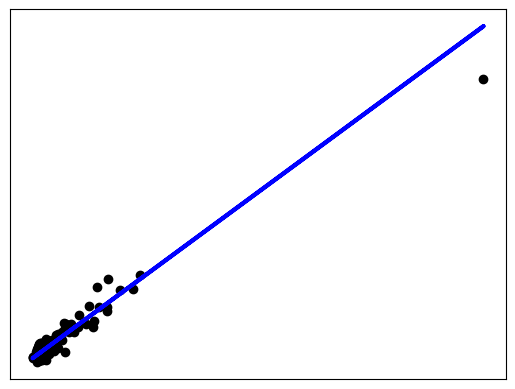

In [181]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()